In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [13]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/ML')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the training data into feature matrix, class labels, and event ids:

In [8]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/content/drive/MyDrive/ML/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape, tX.shape, ids.shape)

# standardize 
tX = (tX - np.mean(tX, axis=0)) / np.std(tX, axis=0)

# split into training set (80%) & validation set (20%)
y_val, tX_val, ids_val = y[200000:], tX[200000:], ids[200000:]
y, tX, ids = y[:200000], tX[:200000], ids[:200000]



(250000,) (250000, 30) (250000,)


In [80]:
# initialize w

from stochastic_gradient_descent import *
from costs import compute_loss

w = np.zeros(tX.shape[1])
losses, accurarcies, ws = [], [], []

for i in range(5):
  losses_epoch, accurarcies_epoch, ws_epoch = stochastic_gradient_descent(y, tX, w, 256, 781, 0.05)
  losses += losses_epoch
  accurarcies += accurarcies_epoch
  ws += ws_epoch
  w = ws[-1]



# for i, (loss, ws) in enumerate(zip(losses, ws)):
#   print(i, loss)

## Do your thing crazy machine learning thing here :) ...

## Plot training loss



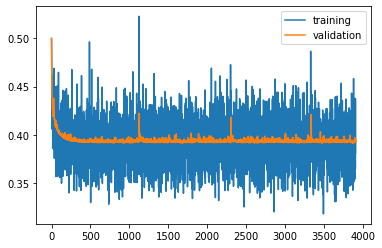

In [81]:
import matplotlib.pyplot as plt

plt.plot(range(len(losses)), losses, label='training')

losses_val = [compute_loss(y_val, tX_val, w) for w in ws]
plt.plot(range(len(losses_val)), losses_val, label='validation')

plt.legend()
plt.show()

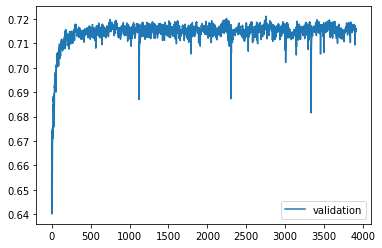

In [83]:
def accurarcy(y, y_pred):
    return (y == y_pred).mean()

# plt.plot(range(len(ws)), accurarcies[0:1] + accurarcies, label='training')

accurarcies_val = [accurarcy(y_val, predict_labels(w, tX_val)) for w in ws]
plt.plot(range(len(ws)), accurarcies_val, label='validation')

plt.legend()
plt.show()


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)